In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import misc
from skimage import io
import math

def readPhoto():
    #Read in image
    image = io.imread('imageKMeans.jpg')
    io.imshow(image)
    io.show()
    return image


In [18]:
def eucliDistance(x1, y1, x2, y2):
      
    d = np.square(x1 - x2) + np.square(y1 - y2)
    d = np.sqrt(d)
  
    return d

In [19]:
#Image Pre-Processing:
def imagePreProcess(image, K):
    #Making values between 0 and 1
    image = image/255

    height = image.shape[0]
    width = image.shape[1]
    channels = image.shape[2]
    size = (height*width*math.log2(K)) + (K*3*8)
    #Transforming 3d array into 2d
    newImg = np.reshape(image, (height * width, channels))
    
    rows, cols = newImg.shape
    
    centroids = np.zeros((K, cols)) 
  
    # random initialization of means. 
    for i in range(K):
        rand1 = int(np.random.random(1)*10)
        rand2 = int(np.random.random(1)*8)
        centroids[i, 0] = newImg[rand1, 0]
        centroids[i, 1] = newImg[rand2, 1]
  
    return newImg, centroids, size



In [20]:
#KMeans Algorithm:
def KMeans(newImg, centroids, K):
    rows, cols = newImg.shape

    index = np.zeros(rows)

    iterations = 0
    inertia = 0

    while(iterations < 10):

        for j in range(len(newImg)):

            minimum = 1000
            temp = None

            #finding the closest centroids to each point
            for l in range(K):

                x1 = newImg[j, 0]
                y1 = newImg[j, 1]
                x2 = centroids[l, 0]
                y2 = centroids[l, 1]

                if(eucliDistance(x1, y1, x2, y2) < minimum):         
                    minimum = eucliDistance(x1, y1, x2, y2)
                    temp = l
                    index[j] = l
                    
            inertia += minimum

        #previous_means = centroids[:]
        for l in range(K):

            sumx = 0
            sumy = 0
            count = 0

            #creating new centroids
            for j in range(len(newImg)):

                if(index[j] == l):
                    sumx += newImg[j, 0]
                    sumy += newImg[j, 1] 
                    count += 1

            if(count == 0):
                count = 1    

            centroids[l, 0] = float(sumx / count)
            centroids[l, 1] = float(sumy / count)
        iterations += 1
        
    return centroids, index, inertia



In [21]:
#Creating new image
def createNew(centroids, index, image):
    #Assigning each pixel to their centroid
    center = np.array(centroids)
    recoveredImg = center[index.astype(int), :]

    #Reshaping into 3d
    recoveredImg = np.reshape(recoveredImg, (image.shape[0], image.shape[1], image.shape[2]))

    #Plotting Image
    plt.imshow(recoveredImg)
    plt.show()


In [22]:
def executeImageCompressor(K):
    img = readPhoto()


    newImg, centroids, size = imagePreProcess(img, K)
    centroids, index, inertia = KMeans(newImg, centroids, K)
    createNew(centroids, index, img)
     
    
    return inertia, size

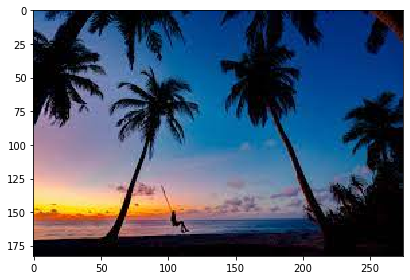

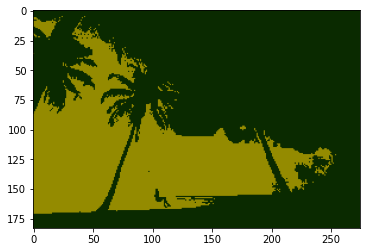

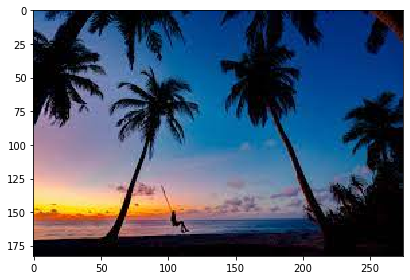

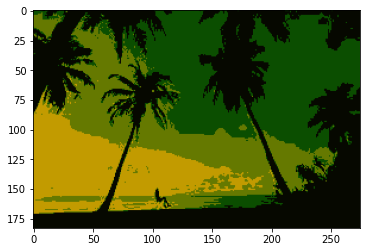

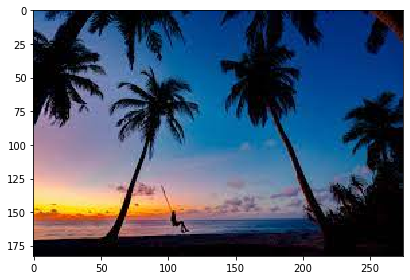

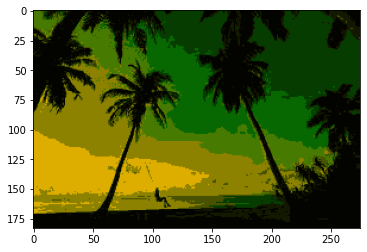

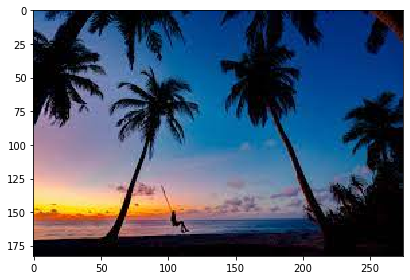

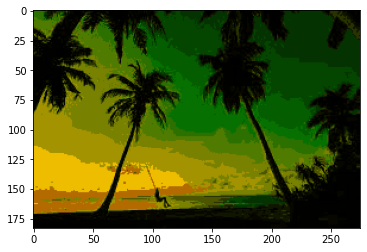

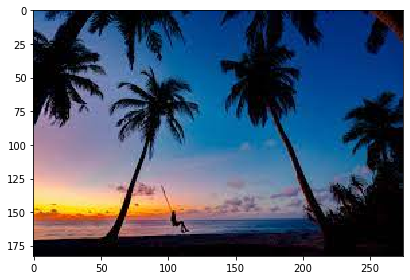

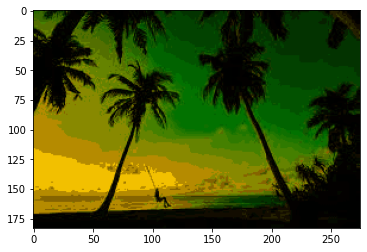

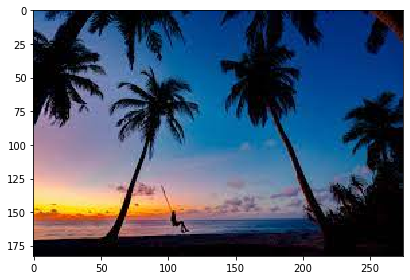

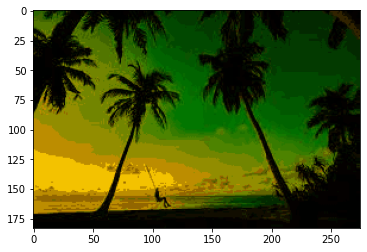

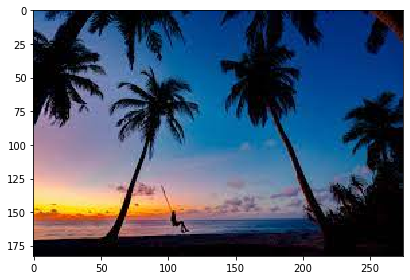

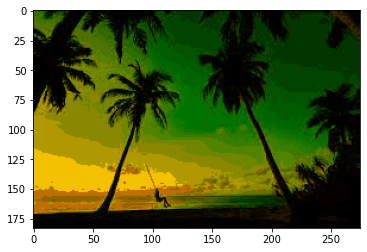

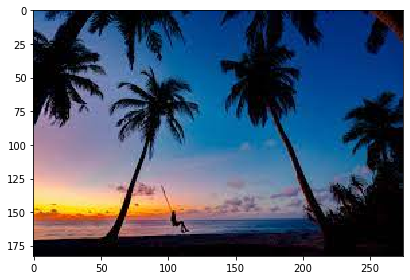

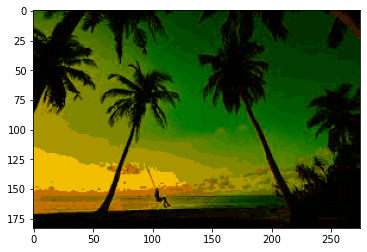

In [23]:
inertiaValues = []
imageSizes = []
for i in range(1, 9):
    inertia, size = executeImageCompressor(2**i)
    inertiaValues.append(inertia)
    imageSizes.append(size/1000000)


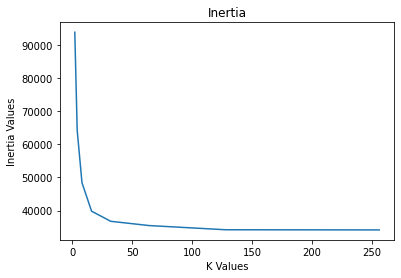

In [24]:
kValues = [2, 4, 8, 16, 32, 64, 128, 256]

plt.plot(kValues, inertiaValues)
plt.title('Inertia')
plt.xlabel('K Values')
plt.ylabel('Inertia Values')
plt.show()

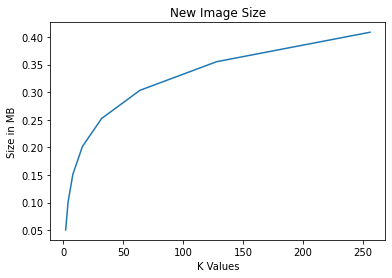

In [25]:
plt.plot(kValues, imageSizes)
plt.title('New Image Size')
plt.xlabel('K Values')
plt.ylabel('Size in MB')
plt.show()